In [1]:
# import torch
# from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df_test = pd.DataFrame({
    'o': [0.20, 0.15, 0.12, 0.09, -0.01, -0.02, -0.03, -0.05, 0.10, 0.07, 0.05, 0.02, -0.09, -0.12, -0.15, -0.20, ],
    'p': [0.22, 0.20, 0.21, 0.15, 0.10, 0.07, 0.09, 0.05, -0.01, -0.03, -0.02, -0.05, -0.10, -0.22, -0.20, -0.25, ],
})
df_train = pd.DataFrame({
    'o': [0.21,0.22,0.25,0.28,0.32,0.33,0.34,0.35,0.36,0.37,0.36,0.35,0.33,0.31,0.29,0.28,0.25,0.21,0.19,0.17,-0.12,-0.11,-0.09,-0.08,-0.07,-0.05,-0.04,-0.03,-0.02,-0.01,-0.01,-0.02,-0.03,-0.04,-0.05,-0.06,-0.07,-0.09,-0.11,-0.13,0.02,0.5,0.08,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.11,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,-0.11,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,-0.02,-0.06,-0.09,-0.13,-0.17,-0.21,-0.22,-0.23,-0.24,-0.25, ],
    'p': [0.22,0.24,0.26,0.29,0.32,0.31,0.29,0.28,0.27,0.26,0.27,0.28,0.29,0.32,0.33,0.31,0.28,0.27,0.26,0.25,0.26,0.27,0.28,0.29,0.31,0.23,0.17,0.11,0.08,0.07,0.08,0.09,0.12,0.13,0.14,0.12,0.09,0.05,0.03,0.01,-0.05,-0.04,-0.03,-0.02,-0.01,-0.03,-0.04,-0.05,-0.06,-0.07,-0.06,-0.05,-0.04,-0.02,-0.01,-0.02,-0.07,-0.09,-0.11,-0.12,-0.11,-0.09,-0.07,-0.06,-0.05,-0.08,-0.11,-0.14,-0.22,-0.26,-0.21,-0.18,-0.15,-0.13,-0.12,-0.13,-0.16,-0.17,-0.21,-0.25, ],
    'State': ['A','A','A','A','A','E','E','E','E','E','I','I','I','I','I','M','M','M','M','M','B','B','B','B','B','F','F','F','F','F','J','J','J','J','J','N','N','N','N','N','C','C','C','C','C','G','G','G','G','G','K','K','K','K','K','O','O','O','O','O','D','D','D','D','D','H','H','H','H','H','L','L','L','L','L','P','P','P','P','P',],
})
df_train.head() 






,State,o,p
0,A,0.21,0.22
1,A,0.22,0.24
2,A,0.25,0.26
3,A,0.28,0.29
4,A,0.32,0.32


In [2]:
# def count(length):
#     a=[0 for i in range(length)]
#     for i in range(length//2):
#         if i%2==0:
#             a[2*i]=1
#             a[(2*i)+1]=1
#     return a
# length=df_train['o'].count()
# a=count(length)
        
# df_train['o_direcition'] = a




df_train.loc[0::1,"o_direcition"] = 0
start=0
for i in range(8):
    if(i%2)==0:
        start=i*10
        df_train.loc[start:start+9,"o_direcition"] = 1

df_train.loc[0::1,"p_direcition"] = 0


for i in range(0,80,5):
    if i%10!=0:
        start=i-5
        end=i-1
        df_train.loc[start:end,"p_direcition"] = 1






In [3]:
df_train.head()



,State,o,p,o_direcition,p_direcition
0,A,0.21,0.22,1.0,1.0
1,A,0.22,0.24,1.0,1.0
2,A,0.25,0.26,1.0,1.0
3,A,0.28,0.29,1.0,1.0
4,A,0.32,0.32,1.0,1.0


In [4]:
df_train.describe()



,o,p,o_direcition,p_direcition
count,80.000000,80.000000,80.000000,80.000000
mean,0.058000,0.058000,0.500000,0.500000
std,0.174924,0.176846,0.503155,0.503155
min,-0.250000,-0.260000,0.000000,0.000000
25%,-0.070000,-0.072500,0.000000,0.000000
50%,0.000000,0.000000,0.500000,0.500000
75%,0.190000,0.260000,1.000000,1.000000
max,0.500000,0.330000,1.000000,1.000000


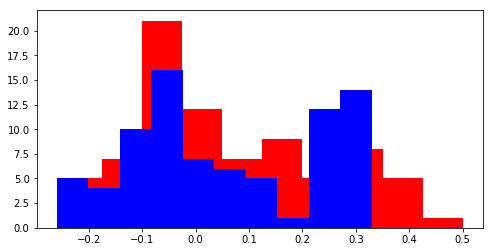

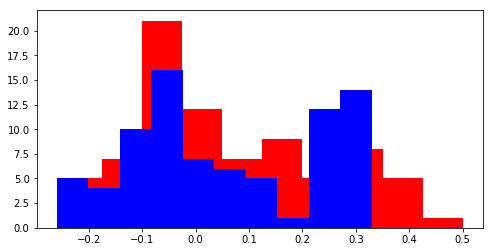

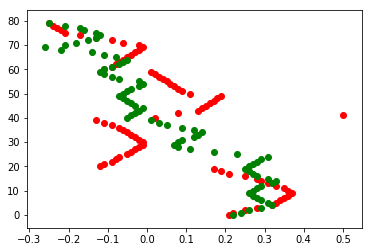

In [5]:
plt.figure(figsize=(8,4))


plt.hist(df_train["o"],color='r',label='input_x')
plt.hist(df_train["p"],color='b',label='input_x')

plt.figure(figsize=(8,4))


plt.hist(df_train["o"],color='r',label='input_x')
plt.hist(df_train["p"],color='b',label='input_x')
plt.show()


plt.scatter(df_train["o"],range(df_train["o"].size),color='r',label='input_x')
plt.scatter(df_train["p"],range(df_train["p"].size),color='g',label='input_x')


plt.show()


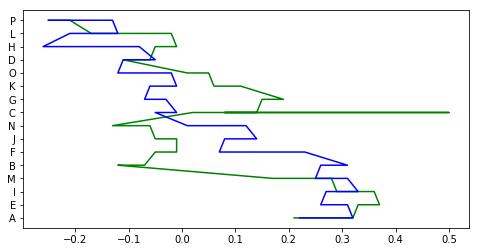

In [6]:
# includes +ve and -ve direction
plt.figure(figsize=(8,4))


plt.plot(df_train["o"],df_train["State"],'g',label='input_x')
plt.plot(df_train["p"],df_train["State"],'b',label='input_x')

(array([ 2.,  4.,  7., 47.,  0.,  2.,  3.,  1.,  5.,  9.]),
 array([-0.21 , -0.156, -0.102, -0.048,  0.006,  0.06 ,  0.114,  0.168,
         0.222,  0.276,  0.33 ]),
 <a list of 10 Patch objects>)

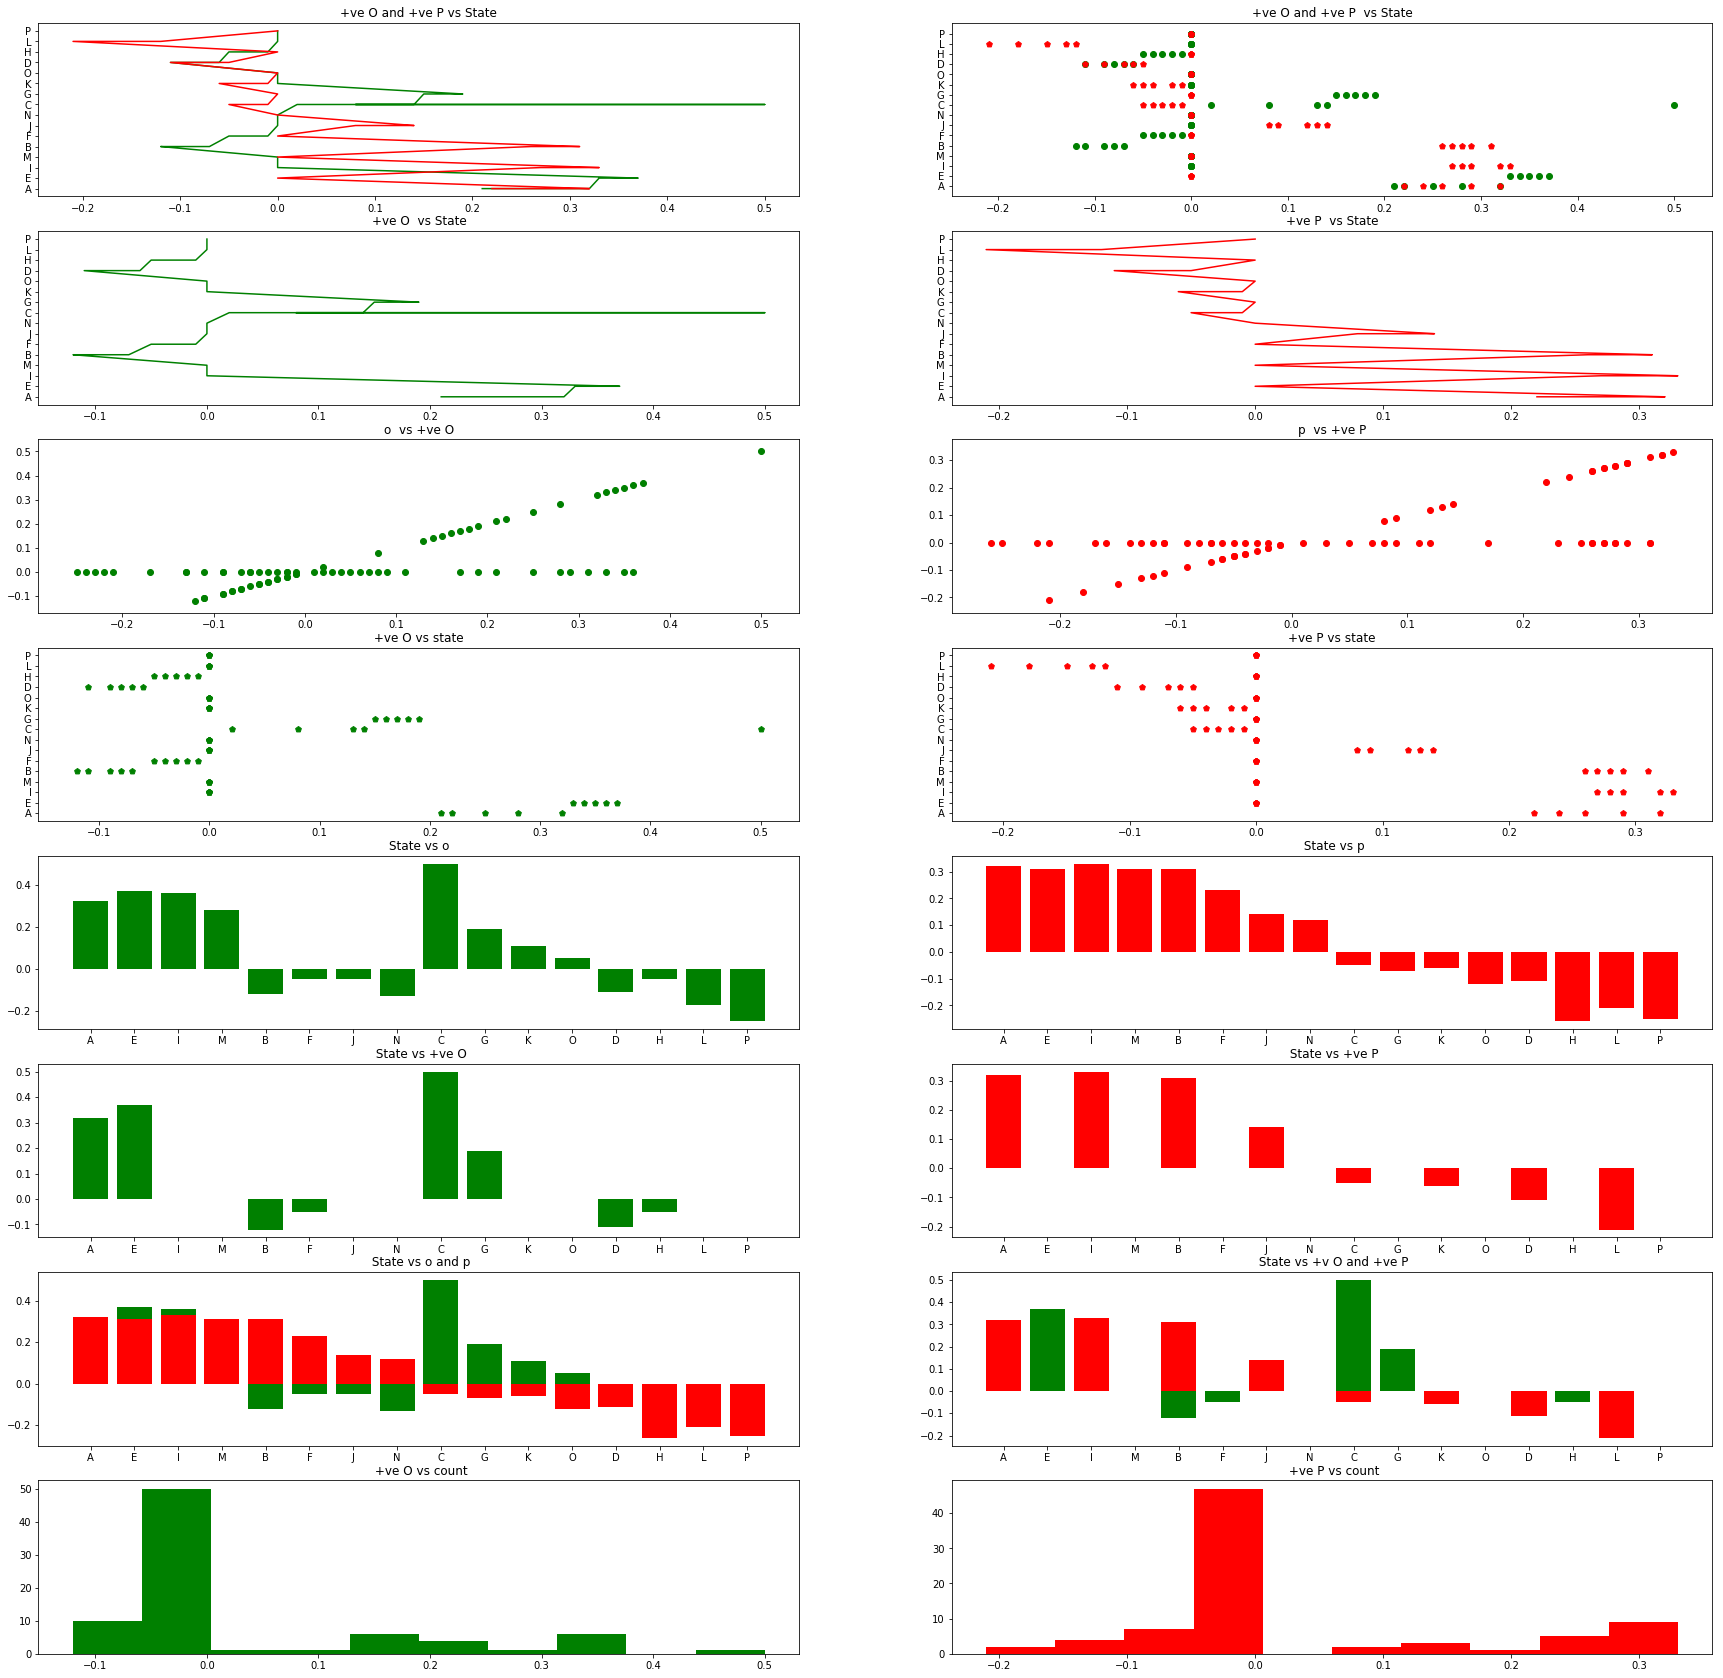

In [7]:
# only +ve Direction
n=30
fig = plt.figure(figsize=(n,n))
ax = fig.subplots(8,2)

O = df_train["o"]*df_train["o_direcition"]
df_train["O"]=O
P=df_train["p"]*df_train["p_direcition"]
df_train["P"]=P

ax[0,0].set_title('+ve O and +ve P vs State')
ax[0,0].plot(O,df_train["State"],'g',label='input_x')
ax[0,0].plot(P,df_train["State"],'r',label='input_x')
ax[0,1].set_title('+ve O and +ve P  vs State')
ax[0,1].scatter(O,df_train["State"],marker="o",color="g")
ax[0,1].scatter(P,df_train["State"],marker="p",color="r")
ax[1,0].set_title('+ve O  vs State')
ax[1,0].plot(O,df_train["State"],'g',label='input_x')
ax[1,1].set_title('+ve P  vs State')
ax[1,1].plot(P,df_train["State"],'r',label='input_x')
ax[2,0].set_title('o  vs +ve O')
ax[2,0].scatter(df_train["o"],O,marker="o",color="g")
ax[2,1].set_title('p  vs +ve P')
ax[2,1].scatter(df_train["p"],P,marker="o",color="r")
ax[3,0].set_title(' +ve O vs state ')
ax[3,0].scatter(O,df_train["State"],marker="p",color="g")
ax[3,1].set_title('+ve P vs state')
ax[3,1].scatter(P,df_train["State"],marker="p",color="r")
ax[4,0].set_title('State vs o')
ax[4,0].bar(df_train["State"],df_train["o"],color="g")
ax[4,1].set_title(' State vs p')
ax[4,1].bar(df_train["State"],df_train["p"],color="r")
ax[5,0].set_title(' State vs +ve O')
ax[5,0].bar(df_train["State"],O,color="g")
ax[5,1].set_title(' State vs +ve P')
ax[5,1].bar(df_train["State"],P,color="r")
ax[6,0].set_title(' State vs o and p')
ax[6,0].bar(df_train["State"],df_train["o"],color="g")
ax[6,0].bar(df_train["State"],df_train["p"],color="r")
ax[6,1].set_title(' State vs +v O and +ve P')
ax[6,1].bar(df_train["State"],O,color="g")
ax[6,1].bar(df_train["State"],P,color="r")
ax[7,0].set_title(' +ve O vs count')
ax[7,0].hist(O,color="g")
ax[7,1].set_title(' +ve P vs count')

ax[7,1].hist(P,color="r")





In [8]:
df_train.drop(labels=['O', 'P'], axis=1, inplace=True)

df_train.head()

,State,o,p,o_direcition,p_direcition
0,A,0.21,0.22,1.0,1.0
1,A,0.22,0.24,1.0,1.0
2,A,0.25,0.26,1.0,1.0
3,A,0.28,0.29,1.0,1.0
4,A,0.32,0.32,1.0,1.0


In [9]:
df_train.loc[0].o

0.21

In [10]:
def direction(n,m):

    if n ==1 and m==1:
        return ["A","B","C","D"]
    elif n ==1 and m==0:

        return ["E",'F',"G","H"]
    elif n ==0 and m==1:

        return ["I","J","K","L"]
    else:

        return ["M","N","O","P"]

a=direction(1,1)

def rangeing(a):
    StateCat=df_train[df_train.State.isin(a)]
    val=[]
    val = [[i,0,0] for i in a]
    start=0
    j=0
    for i in range(StateCat.shape[0]):
        o = []
        p = []
        if(i%5==0):
            o.append(0 if StateCat.iloc[i].o< 0 else 1)
            p.append(0 if StateCat.iloc[i].p < 0 else 1)
            val[j]=o[0],p[0]
            j+=1 
    return val     
r=rangeing(a)
result=[i for i in zip(a,r)]
StateRange_test = pd.DataFrame(result,columns = ['State', 'data'])




In [11]:
StateRange_test["data"][0]

(1, 1)

In [12]:
def count(length):
    a=[0 for i in range(length)]
    for i in range(length//2):
        if i%2==0:
            a[2*i]=1
            a[(2*i)+1]=1
    return a
length=df_test['o'].count()
a=count(length)
        
df_test['o_direcition'] = a
df_test['p_direcition'] = 1
df_test.loc[1::2,"p_direcition"] = 0

df_test.head()

,o,p,o_direcition,p_direcition
0,0.20,0.22,1,1
1,0.15,0.20,1,0
2,0.12,0.21,0,1
3,0.09,0.15,0,0
4,-0.01,0.10,1,1


In [13]:
df_test_new=df_test
df_test_new['o_nw'] = df_test['o'].apply(lambda x : 1 if x>0 else 0)
df_test_new['p_nw'] = df_test['p'].apply(lambda x : 1 if x>0 else 0)

df_test_new.head()

,o,p,o_direcition,p_direcition,o_nw,p_nw
0,0.20,0.22,1,1,1,1
1,0.15,0.20,1,0,1,1
2,0.12,0.21,0,1,1,1
3,0.09,0.15,0,0,1,1
4,-0.01,0.10,1,1,0,1


In [33]:
def finalResult(n):
    a=direction(n.o_direcition,n.p_direcition)
    r=rangeing(a)
    result=[i for i in zip(a,r)]
    StateRange = pd.DataFrame(result,columns = ['State', 'data'])
    check=StateRange.data.iloc[:]==(n.o_nw,n.p_nw)
    print(StateRange[check]["State"])

    
finalResult(df_test_new.loc[5])

1    F
Name: State, dtype: object


In [31]:
df_test_new.loc[5]

,o,p,o_direcition,p_direcition,o_nw,p_nw
0,0.20,0.22,1,1,1,1
1,0.15,0.20,1,0,1,1
2,0.12,0.21,0,1,1,1
3,0.09,0.15,0,0,1,1
4,-0.01,0.10,1,1,0,1
5,-0.02,0.07,1,0,0,1
6,-0.03,0.09,0,1,0,1
7,-0.05,0.05,0,0,0,1
8,0.10,-0.01,1,1,1,0
9,0.07,-0.03,1,0,1,0
